<a href="https://colab.research.google.com/github/lukasztracz195/DeepLearningInPythonCourse/blob/main/MNIST_nn_ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sieć Neuronowa - Perceptron Wielowarstwowy - Multiplayer Perceptron

####Import bibliotek

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils

####Załadowanie danych

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#####Eksloracja danych

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych: ', X_train.shape[0])
print('Liczzba danych testowych: ',X_test.shape[0])
print("Rozmiar pojedynczego obrazka: ", X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:  60000
Liczzba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

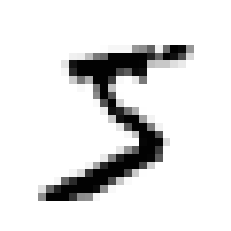

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

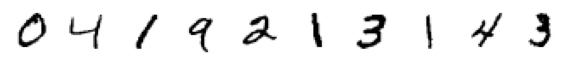

In [14]:
plt.figure(figsize=(10,10))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='Greys')
plt.show()

###Etykiety


In [7]:
X_train.shape

(60000, 28, 28)

### Przygotowanie danych

In [15]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [16]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Budowa modelu

In [17]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

### Trenowanie modelu

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.2149 - accuracy: 0.9331 - val_loss: 0.1502 - val_accuracy: 0.9509
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0821 - accuracy: 0.9746 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.1005 - val_accuracy: 0.9703
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0380 - accuracy: 0.9887 - val_loss: 0.0797 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0899 - val_accuracy: 0.9776
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0966 - val_accuracy: 0.9801
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.1270 - val_accuracy: 0.9761

In [22]:
model.evaluate(X_test, y_test)
# print("[ Wartość funckji straty, Wartość  accuracy ]")

313/313 [==============================] - 1s 3ms/step - loss: 0.1749 - accuracy: 0.9835


[0.17486846446990967, 0.9835000038146973]

### Wykres dokładności i straty

In [23]:
def make_accuracy_plot(history):
  """
  Funckja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym i walidacyjnym.
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  epochs = range(1, len(acc)+1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label='Dokladność trenowania', marker='o')
  plt.plot(epochs, val_acc, label='Dokladność walidacji', marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

In [24]:
def make_loss_plot(history):
  """
  Funkjca zwraca wykres straty (loss) modelu na zbiorze treningowym
  i walidacyjnym
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss)+ 1)

  plt.figure(figsize = (10,8))
  plt.plot(epochs, loss, label='Strata trenowania', marker='o')
  plt.plot(epochs, val_loss, label="Strata walidacji", marker='o')
  plt.legend()
  plt.title('Strata trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Strata')
  plt.show()

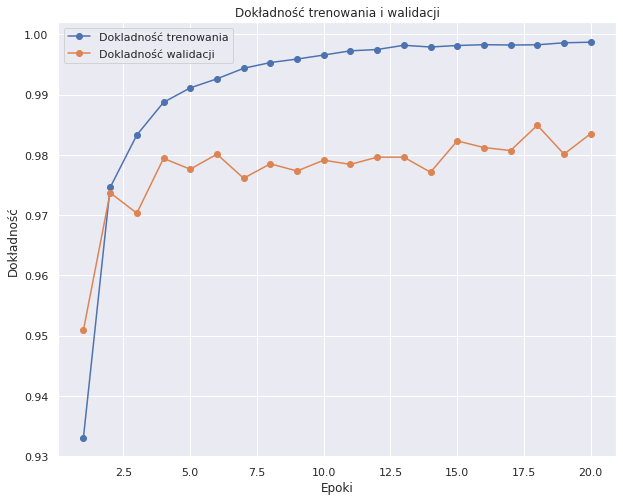

In [25]:
make_accuracy_plot(history)

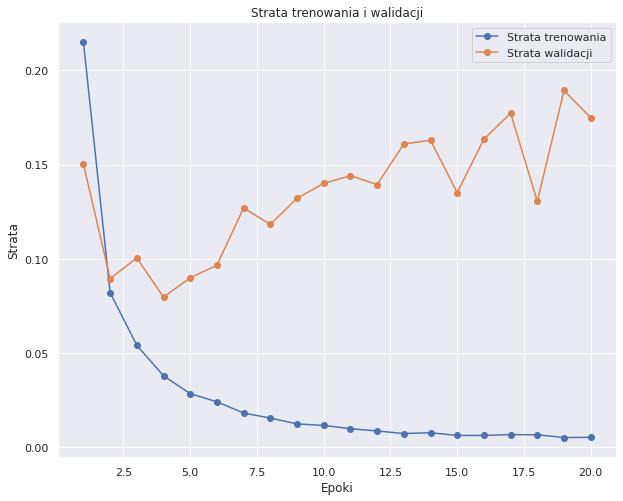

In [26]:
make_loss_plot(history)

### Nap odstawie tych dwóch wykresów jestśmy w stanie zlokalizować zjawisko overfitingu na drugim wykresie jest to epoka od której funkcja prezentująca nasza stratę walidacji zaczyna rosnąć a nie maleć.
### Z powyższych wykresów wynika że powinniśmy przerwać uczenie się sieci już po 5-6 epokach